In [1]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib
import os
import statsmodels

In [2]:
#df=ts.get_k_data('600600') #直接使用tushare包获取股票最新数据
excel_path = os.path.join('/Users','liuhuanshuo','desktop','作业','量化','单佳雷数据','沪A股票原始数据/') + '601939.SH' + '.xls'
df = pd.read_excel(excel_path) 
df = df.loc[:,['代码','日期','开盘价(元)','收盘价(元)']]
df

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,代码,日期,开盘价(元),收盘价(元)
0,601939.SH,2016-01-04,5.4590,5.2982
1,601939.SH,2016-01-05,5.2225,5.2793
2,601939.SH,2016-01-06,5.2793,5.3360
3,601939.SH,2016-01-07,5.2982,5.1941
4,601939.SH,2016-01-08,5.2793,5.2414
5,601939.SH,2016-01-11,5.1941,5.0144
6,601939.SH,2016-01-12,5.0522,4.9860
7,601939.SH,2016-01-13,5.0522,4.9198
8,601939.SH,2016-01-14,4.8252,4.9292
9,601939.SH,2016-01-15,4.9008,4.8157


In [3]:
df['MA10_rolling'] = pd.rolling_mean(df['收盘价(元)'],10)
close = [float(x) for x in df['收盘价(元)']]
#MA调用形式 ma = MA(close, timeperiod=30, matype=0)不
df['MA10_talib'] = talib.MA(np.array(close), timeperiod=10)
df.tail(12)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """Entry point for launching an IPython kernel.


,代码,日期,开盘价(元),收盘价(元),MA10_rolling,MA10_talib
317,601939.SH,2017-04-25,5.89,5.93,5.875,5.875
318,601939.SH,2017-04-26,5.92,5.98,5.877,5.877
319,601939.SH,2017-04-27,5.98,5.96,5.881,5.881
320,601939.SH,2017-04-28,5.94,5.98,5.891,5.891
321,601939.SH,2017-05-02,5.97,5.91,5.893,5.893
322,601939.SH,2017-05-03,5.91,5.88,5.898,5.898
323,601939.SH,2017-05-04,5.88,5.89,5.911,5.911
324,601939.SH,2017-05-05,5.88,5.94,5.929,5.929
325,601939.SH,2017-05-08,5.91,5.93,5.930,5.930
326,601939.SH,2017-05-09,5.93,5.93,5.933,5.933


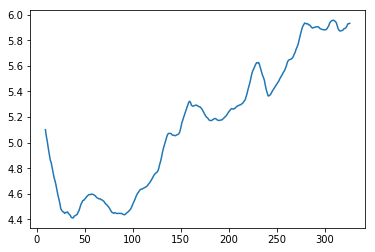

In [4]:
plt.plot(df['MA10_talib'])

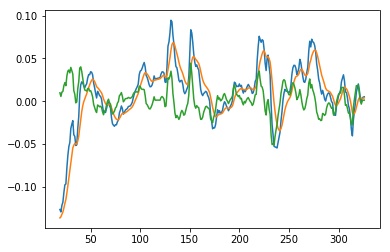

In [5]:
close = [float(x) for x in df['收盘价(元)']]
# # 调用talib计算6日指数移动平均线的值
df['EMA12'] = talib.EMA(np.array(close), timeperiod=6)  
df['EMA26'] = talib.EMA(np.array(close), timeperiod=12)   
 # 调用talib计算MACD指标
df['MACD'],df['MACDsignal'],df['MACDhist'] = talib.MACD(np.array(close),
                            fastperiod=6, slowperiod=12, signalperiod=9)   
df.tail(12)
plt.plot(df['MACD'])
plt.plot(df['MACDsignal'])
plt.plot(df['MACDhist'])

In [6]:
#一个策略当macd下穿signal时，卖出股票
       #当macd上穿signal时，买入股票
df=ts.get_k_data('601939')
df['MA10_rolling'] = pd.rolling_mean(df['close'],10)
close = [float(x) for x in df['close']]
# 调用talib计算10日移动平均线的值
df['MA10_talib'] = talib.MA(np.array(close), timeperiod=10) 
df.tail(12)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.


,date,open,close,high,low,volume,code,MA10_rolling,MA10_talib
629,2018-03-15,8.00,8.06,8.09,7.99,759044.0,601939,8.160,8.160
630,2018-03-16,8.05,7.91,8.06,7.88,1328906.0,601939,8.130,8.130
631,2018-03-19,7.91,8.03,8.04,7.88,943986.0,601939,8.120,8.120
632,2018-03-20,7.97,8.11,8.14,7.96,1005053.0,601939,8.120,8.120
633,2018-03-21,8.15,8.11,8.22,8.07,950290.0,601939,8.105,8.105
634,2018-03-22,8.11,8.04,8.15,7.91,1089730.0,601939,8.091,8.091
635,2018-03-23,7.86,7.76,7.92,7.64,2184834.0,601939,8.042,8.042
636,2018-03-26,7.72,7.48,7.72,7.37,1928107.0,601939,7.975,7.975
637,2018-03-27,7.59,7.45,7.60,7.36,2059960.0,601939,7.902,7.902
638,2018-03-28,7.36,7.43,7.66,7.33,2114776.0,601939,7.838,7.838


In [7]:
#https://blog.csdn.net/niuge8905/article/details/78287355
df['EMA12'] = talib.EMA(np.array(close), timeperiod=6)  
df['EMA26'] = talib.EMA(np.array(close), timeperiod=12)   
df['MACD'],df['MACDsignal'],df['MACDhist'] = talib.MACD(np.array(close),
                            fastperiod=6, slowperiod=12, signalperiod=9)   
df.tail(12)

,date,open,close,high,low,volume,code,MA10_rolling,MA10_talib,EMA12,EMA26,MACD,MACDsignal,MACDhist
629,2018-03-15,8.00,8.06,8.09,7.99,759044.0,601939,8.160,8.160,8.135272,8.229057,-0.093785,-0.108722,0.014938
630,2018-03-16,8.05,7.91,8.06,7.88,1328906.0,601939,8.130,8.130,8.070909,8.179971,-0.109063,-0.108790,-0.000272
631,2018-03-19,7.91,8.03,8.04,7.88,943986.0,601939,8.120,8.120,8.059221,8.156899,-0.097678,-0.106568,0.008890
632,2018-03-20,7.97,8.11,8.14,7.96,1005053.0,601939,8.120,8.120,8.073729,8.149684,-0.075955,-0.100445,0.024491
633,2018-03-21,8.15,8.11,8.22,8.07,950290.0,601939,8.105,8.105,8.084092,8.143578,-0.059486,-0.092254,0.032767
634,2018-03-22,8.11,8.04,8.15,7.91,1089730.0,601939,8.091,8.091,8.071494,8.127643,-0.056149,-0.085033,0.028884
635,2018-03-23,7.86,7.76,7.92,7.64,2184834.0,601939,8.042,8.042,7.982496,8.071083,-0.088587,-0.085743,-0.002843
636,2018-03-26,7.72,7.48,7.72,7.37,1928107.0,601939,7.975,7.975,7.838926,7.980147,-0.141221,-0.096839,-0.044382
637,2018-03-27,7.59,7.45,7.60,7.36,2059960.0,601939,7.902,7.902,7.727804,7.898586,-0.170782,-0.111628,-0.059154
638,2018-03-28,7.36,7.43,7.66,7.33,2114776.0,601939,7.838,7.838,7.642717,7.826496,-0.183779,-0.126058,-0.057721


In [10]:
ts.get_hist_data('601939')

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2018-03-29,7.46,7.83,7.68,7.37,2279980.00,0.25,3.37,7.560,7.800,7.982,2113531.88,1588562.60,1532518.70,2.38
2018-03-28,7.36,7.66,7.43,7.33,2114776.25,-0.02,-0.27,7.632,7.839,8.010,1875481.93,1436469.01,1480586.49,2.20
2018-03-27,7.59,7.60,7.45,7.36,2059960.88,-0.03,-0.40,7.768,7.903,8.054,1642584.76,1325532.81,1435537.25,2.15
2018-03-26,7.72,7.72,7.48,7.37,1928107.75,-0.28,-3.61,7.900,7.976,8.102,1431603.28,1268847.47,1417740.46,2.01
2018-03-23,7.86,7.92,7.76,7.64,2184834.50,-0.28,-3.48,8.010,8.045,8.165,1234778.98,1296514.30,1387455.28,2.28
2018-03-22,8.11,8.15,8.04,7.91,1089730.25,-0.07,-0.86,8.040,8.093,8.217,1063593.33,1181235.67,1342593.75,1.14
2018-03-21,8.15,8.22,8.11,8.07,950290.44,0.00,0.00,8.046,8.108,8.254,997456.10,1196761.87,1355040.03,0.99
2018-03-20,7.97,8.14,8.11,7.96,1005053.44,0.08,1.00,8.038,8.123,8.272,1008480.86,1340112.85,1360822.43,1.05
2018-03-19,7.91,8.04,8.03,7.88,943986.25,0.12,1.52,8.052,8.122,8.288,1106091.67,1450647.88,1405929.88,0.98


In [11]:
ts.get_realtime_quotes('601939')

,name,open,pre_close,price,high,low,bid,ask,volume,amount,...,a2_p,a3_v,a3_p,a4_v,a4_p,a5_v,a5_p,date,time,code
0,建设银行,7.680,7.670,7.730,7.820,7.660,7.720,7.730,72820087,563145302.000,...,7.740,5016,7.750,4024,7.760,3035,7.770,2018-03-30,11:30:00,601939


In [12]:
ts.realtime_boxoffice()

,BoxOffice,Irank,MovieName,boxPer,movieDay,sumBoxOffice,time
0,2283.32,1,头号玩家,50.46,1,2566.63,2018-03-30 11:48:12
1,746.67,2,厉害了，我的国,16.50,29,43359.68,2018-03-30 11:48:12
2,335.07,3,环太平洋2：雷霆再起,7.41,8,50910.38,2018-03-30 11:48:12
3,277.11,4,花滑女王,6.12,1,302.15,2018-03-30 11:48:12
4,257.56,5,通勤营救,5.69,1,264.15,2018-03-30 11:48:12
5,220.99,6,遇见你真好,4.88,2,1441.49,2018-03-30 11:48:12
6,153.94,7,我说的都是真的,3.40,1,159.88,2018-03-30 11:48:12
7,61.88,8,红海行动,1.37,43,358856.70,2018-03-30 11:48:12
8,59.54,9,古墓丽影：源起之战,1.32,15,47864.89,2018-03-30 11:48:12
9,42.05,10,第三度嫌疑人,0.93,1,47.13,2018-03-30 11:48:12
